<a href="https://colab.research.google.com/github/Prerana-Bijekar/ML/blob/main/Bonus-Assignment-6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [7]:
# 1. Load the dataset
from google.colab import files
uploaded=files.upload()
df=pd.read_csv("Wine Quality Dataset.csv")
df.head()

Saving Wine Quality Dataset.csv to Wine Quality Dataset (3).csv


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
# 2. Preprocess the data

# Fill missing values with the median (for numerical columns)
df.fillna(df.median(numeric_only=True), inplace=True)

# Encode the categorical feature 'type' (e.g., red = 0, white = 1)
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

# Separate features and target variable (quality)
X = df.drop(columns=['quality'])
y = df['quality']

# Split the dataset into training (80%) and testing (20%) sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

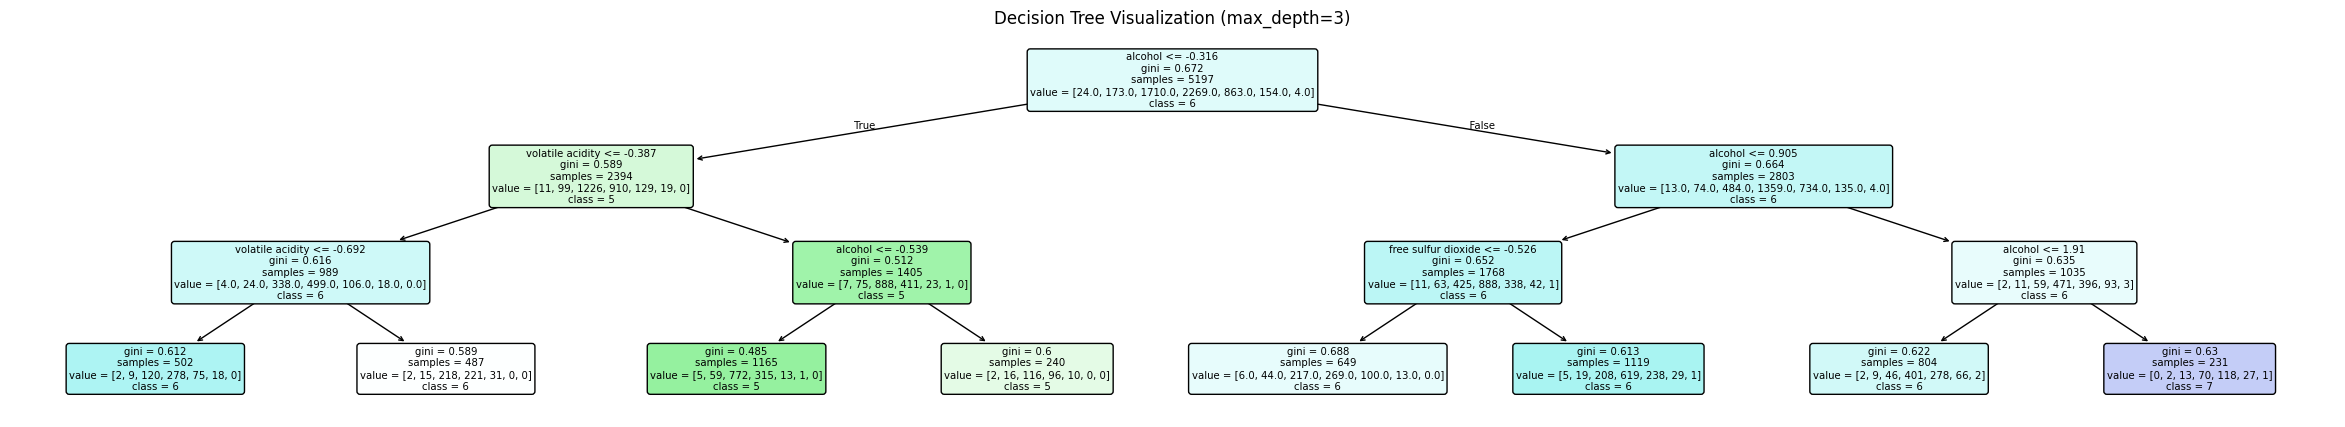

In [24]:
# 3. Train a Decision Tree Classifier
# Limiting the tree depth to 3 for easier visualization
clf = DecisionTreeClassifier(random_state=42, max_depth=3)
clf.fit(X_train_scaled, y_train)

# Visualize the Decision Tree
plt.figure(figsize=(30, 5))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=[str(c) for c in sorted(y.unique())],
    filled=True,
    rounded=True
)
plt.title("Decision Tree Visualization (max_depth=3)")
plt.show()

In [22]:
# 4. Evaluate the model's performance on the test set
y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Initial Decision Tree Performance:")
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1-score :", f1)

Initial Decision Tree Performance:
Accuracy : 0.5269230769230769
Precision: 0.5553287745280342
Recall   : 0.5269230769230769
F1-score : 0.47874819964224896


In [23]:
# 5. Hyperparameter Tuning with GridSearchCV
param_grid = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"]
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its performance
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

best_accuracy = accuracy_score(y_test, y_pred_best)
best_precision = precision_score(y_test, y_pred_best, average='weighted', zero_division=1)
best_recall = recall_score(y_test, y_pred_best, average='weighted')
best_f1 = f1_score(y_test, y_pred_best, average='weighted')

print("\nBest Hyperparameters:", grid_search.best_params_)
print("Best Model Performance:")
print("Accuracy :", best_accuracy)
print("Precision:", best_precision)
print("Recall   :", best_recall)
print("F1-score :", best_f1)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(



Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Model Performance:
Accuracy : 0.5953846153846154
Precision: 0.5982130201790316
Recall   : 0.5953846153846154
F1-score : 0.5966609946112498
